In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

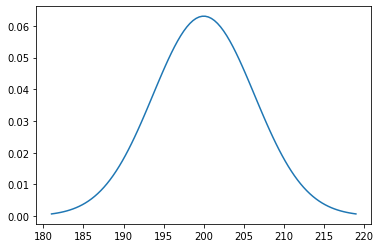

In [7]:
mu = 200
variance = 40
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

basically sampling - from the distribution.

In [8]:
for _ in range(5):
    print("Result: x_new = %.2f" % np.random.normal(200, 40))


Result: x_new = 184.48
Result: x_new = 221.91
Result: x_new = 110.20
Result: x_new = 297.26
Result: x_new = 228.67


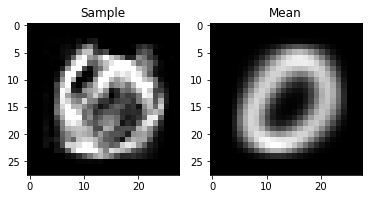

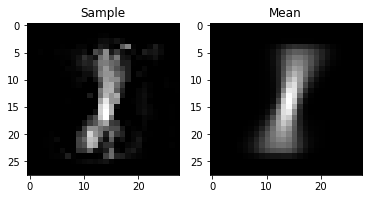

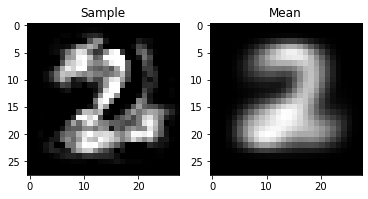

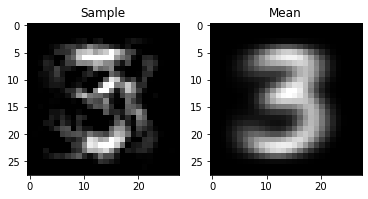

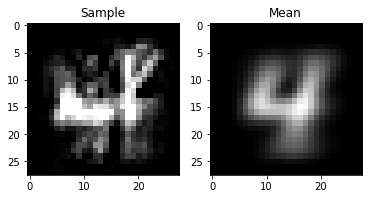

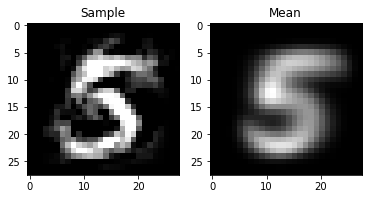

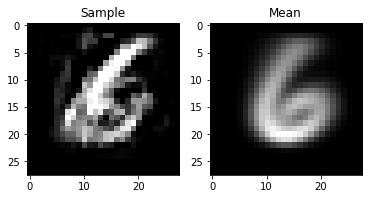

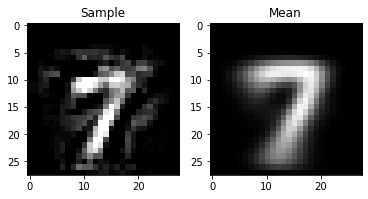

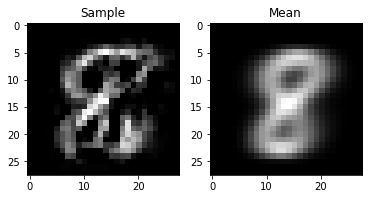

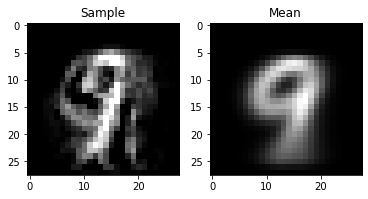

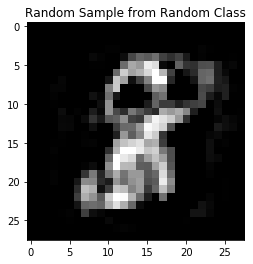

In [19]:
from scipy.stats import multivariate_normal as mvn
import pandas as pd
from sklearn.utils import shuffle

def clamp_sample(x):
  x = np.minimum(x, 1)
  x = np.maximum(x, 0)
  return x

class BayesClassifier:
  def fit(self, X, Y):
    # assume classes are numbered 0...K-1
    self.K = len(set(Y))

    self.gaussians = []
    self.p_y = np.zeros(self.K)
    for k in range(self.K):
      Xk = X[Y == k]
      self.p_y[k] = len(Xk)
      # Calculate mean and co-variance for all values of 
      # y that is equal to k
      # you append it to gaussians list.
      mean = Xk.mean(axis=0)
      cov = np.cov(Xk.T)
      # Dictionary g storing all means and cov
      g = {'m': mean, 'c': cov}
      self.gaussians.append(g)
    # normalize p(y)
    self.p_y /= self.p_y.sum()

  def sample_given_y(self, y):
    g = self.gaussians[y]
    return clamp_sample( mvn.rvs(mean=g['m'], cov=g['c']) )

  def sample(self):
    y = np.random.choice(self.K, p=self.p_y)
    return clamp_sample( self.sample_given_y(y) )

def get_mnist(limit=None):
    df = pd.read_csv('train.csv')
    data = df.values
    # np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    X, Y = shuffle(X, Y)
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

if __name__ == '__main__':
  X, Y = get_mnist()
  clf = BayesClassifier()
  clf.fit(X, Y)

  for k in range(clf.K):
    # show one sample for each class
    # also show the mean image learned

    sample = clf.sample_given_y(k).reshape(28, 28)
    mean = clf.gaussians[k]['m'].reshape(28, 28)

    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

  # generate a random sample
  sample = clf.sample().reshape(28, 28)
  plt.imshow(sample, cmap='gray')
  plt.title("Random Sample from Random Class")